In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [31]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Interpolacion.csv'


if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [32]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,5,10
1,10,15
2,15,25


In [33]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[ 5. 10. 15.] [10. 15. 25.]


In [35]:
X = np.array([1,2,3,4,5])
Y = np.array([-3.4,-5.6,0,3,3.5])

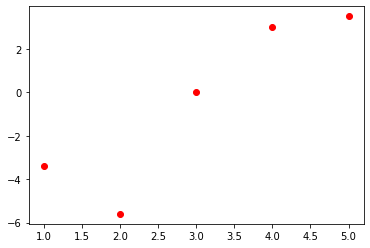

In [36]:
plt.scatter(X,Y,color='r',marker='o')

In [37]:
Diff = np.zeros((len(X),len(X)))
Diff[:,0] = Y
Diff

for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
Diff

array([[ -3.4,   0. ,   0. ,   0. ,   0. ],
       [ -5.6,  -2.2,   0. ,   0. ,   0. ],
       [  0. ,   5.6,   7.8,   0. ,   0. ],
       [  3. ,   3. ,  -2.6, -10.4,   0. ],
       [  3.5,   0.5,  -2.5,   0.1,  10.5]])

In [38]:
def NewtonInterpolation(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(X)))
    h = X[1] - X[0]
    
    Diff[:,0] = Y
    
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= (x - X[i-1])
        
        for j in range(i,len(X)): 
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
        
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))

    return sum_

In [39]:
xt = np.linspace(X[0],X[-1],100)

yt = []

for i in range(len(xt)):
    yt.append(NewtonInterpolation(X,Y,xt[i]))



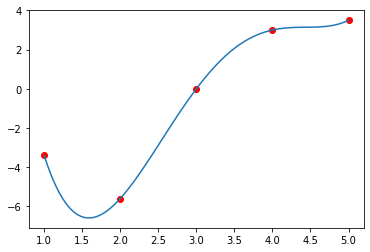

In [40]:
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)

In [41]:
x = sym.Symbol('x',real=True)

In [42]:
y = NewtonInterpolation(X,Y,x)
y

-2.2*x + 0.4375*(x - 4)*(x - 3)*(x - 2)*(1.0*x - 1.0) - 1.73333333333333*(x - 3)*(x - 2)*(1.0*x - 1.0) + 3.9*(x - 2)*(1.0*x - 1.0) - 1.2

In [43]:
y = sym.simplify(y)
y

0.4375*x**4 - 6.10833333333333*x**3 + 29.6125*x**2 - 54.8416666666667*x + 27.5